# ÖDEV-4

## Ön hazırlık dosyasında verilen kodlar aşağıya yazılacak:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl

z = np.array([0])            # a zero @z=0
p = np.array([1.0/4, 1.0/2]) # poles of system
b,a = sgnl.zpk2tf(z,p,1)     # since there's no gain k=1
b,a

# alternative way to expand a product
a = sgnl.convolve(np.array([1,-1/4]), np.array([1,-1/2]))
a

# given the coeffs of numerator, i.e. b(z) and the coeffs of denominator a(z),
# we do the partial fraction expansion by:
r, p, k = sgnl.residuez(b,a) # 
r,p,k
# to check the correctness of the polynomial roots (i.e. p's) we can use
poless = np.roots(a) # returns the polynomial coefficients of the denominator

<IPython.core.display.Javascript object>


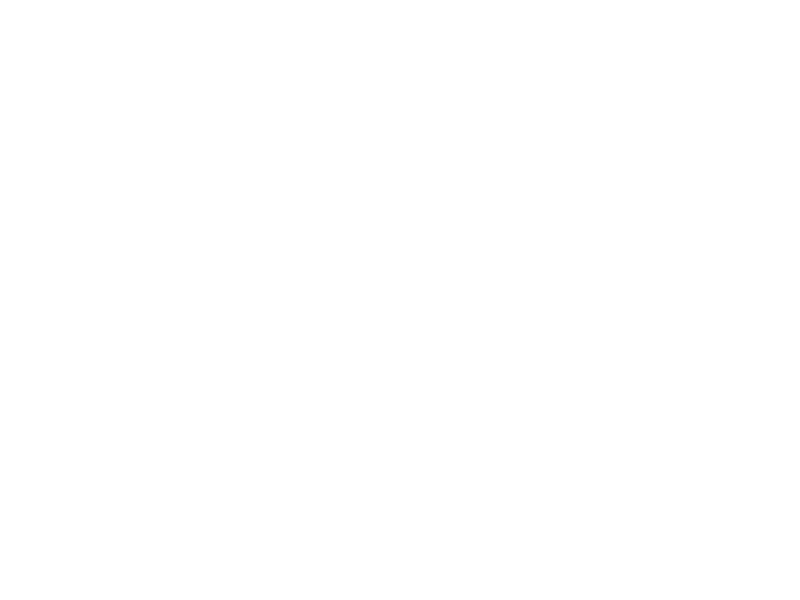

(array([[1.        ],
        [0.75      ],
        [0.4375    ],
        [0.234375  ],
        [0.12109375],
        [0.06152344],
        [0.03100586],
        [0.01556396],
        [0.00779724],
        [0.00390244]]),)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

num = np.array([1,0,0])
denum = np.array([1,-3.0/4,1.0/8])
n,x = sgnl.dimpulse((num,denum,1),x0=0,n=10)
plt.stem(n,np.squeeze(x))
x

<IPython.core.display.Javascript object>


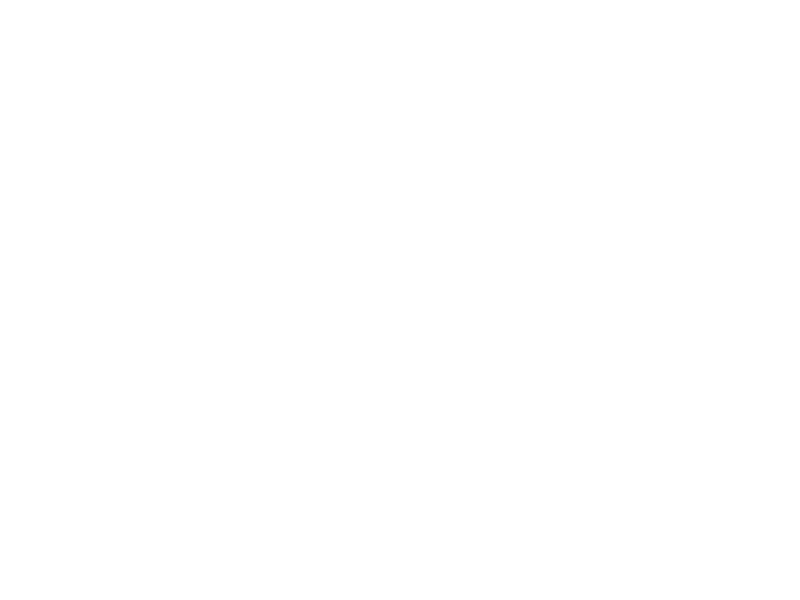

Text(0.5, 0, 'index vector(sample)')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

n = np.arange(0,10,1) #define the index vector for 10 points
xpf = -(1.0/4)**n + 2*(1.0/2)**n #result of ornek-7

num = np.array([1,0,0])
denum = np.array([1,-3.0/4,1.0/8]) # coeffs of denum

n1,xpse = sgnl.dimpulse((num,denum,1),x0=0,n=10)
xpse = np.squeeze(xpse)

plt.subplot(2,1,1) 
plt.stem(n,xpf)
plt.ylabel('$x_{pf[n]}$')

plt.subplot(2,1,2)
plt.stem(n,xpse)
plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector(sample)')

<IPython.core.display.Javascript object>


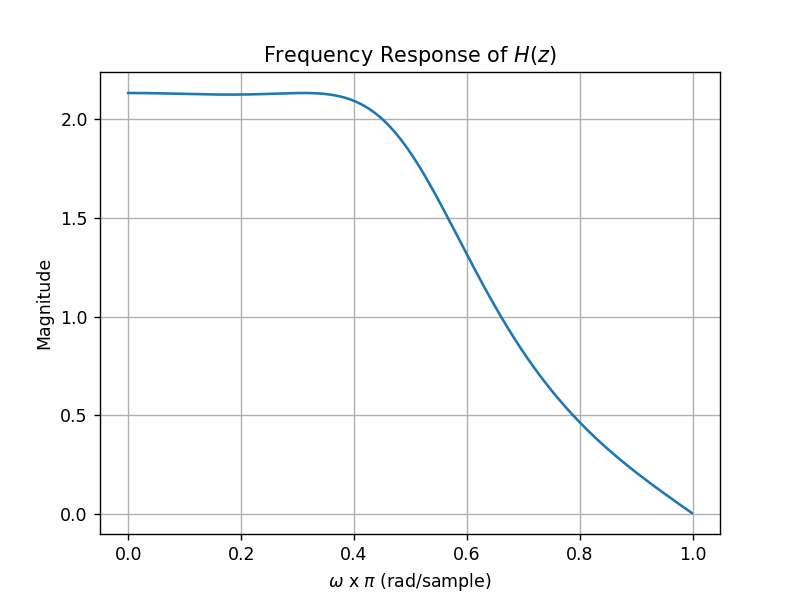

<IPython.core.display.Javascript object>


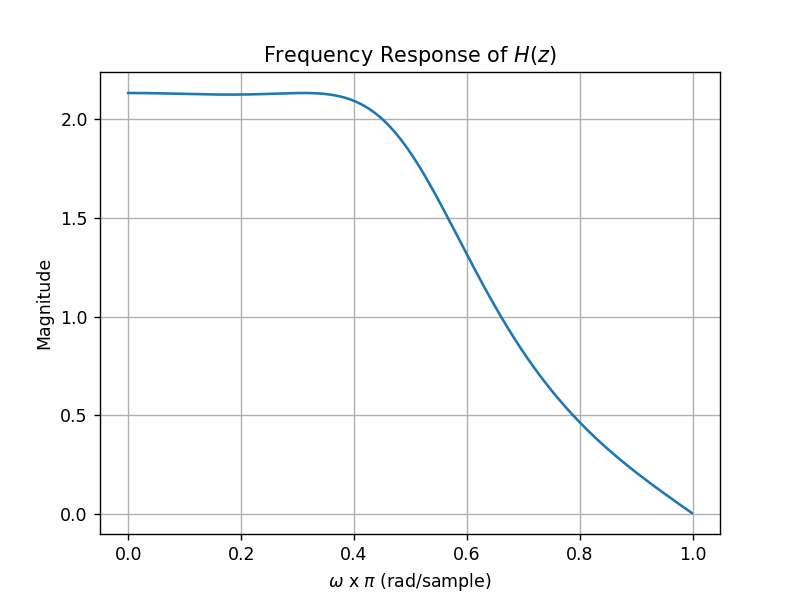

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
%matplotlib notebook

zeros = np.array([-1])
poles = np.array([1j/2, -1j/2, 1.0/4])
w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.plot(w/np.pi, abs(H))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

num, denum = sgnl.zpk2tf(zeros, poles, 1)
w1, H_tf = sgnl.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

<IPython.core.display.Javascript object>


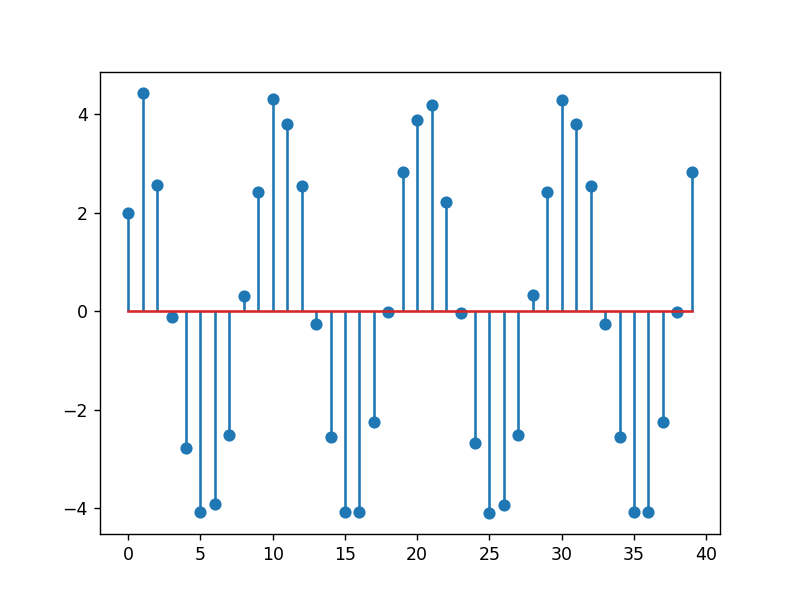

<StemContainer object of 3 artists>

In [5]:
n = np.arange(0, 40, 1) # define the index vector
xn = 2*np.cos(0.2*np.pi*n) + np.sin(0.9*np.pi*n) # define the input signal
yn = sgnl.lfilter(num, denum, xn)
plt.figure()
plt.stem(n, yn)

<IPython.core.display.Javascript object>


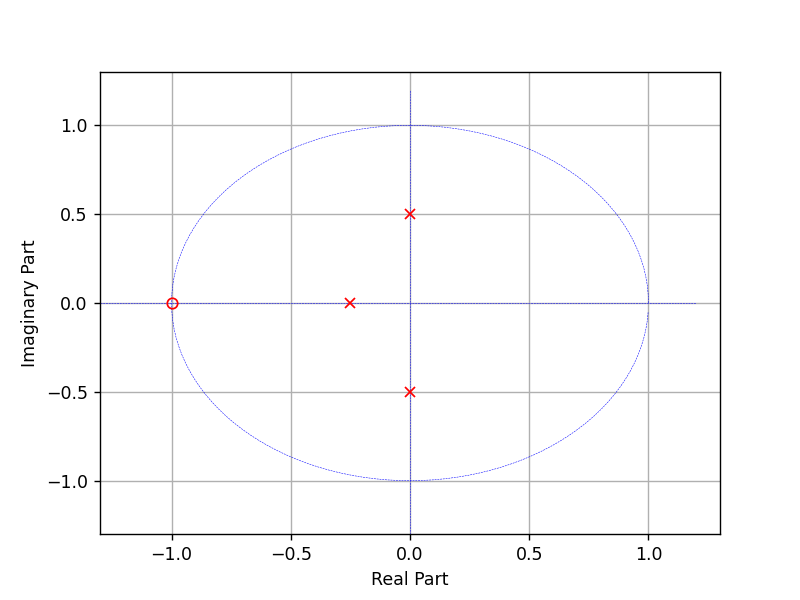

In [6]:
import zplane

zeross = np.array([-1])
poless = np.array([-1j/2, 1j/2, -1/4])
k = 1

b,a = sgnl.zpk2tf(zeross,poless,k)

zplane.zplane(b,a)

<IPython.core.display.Javascript object>


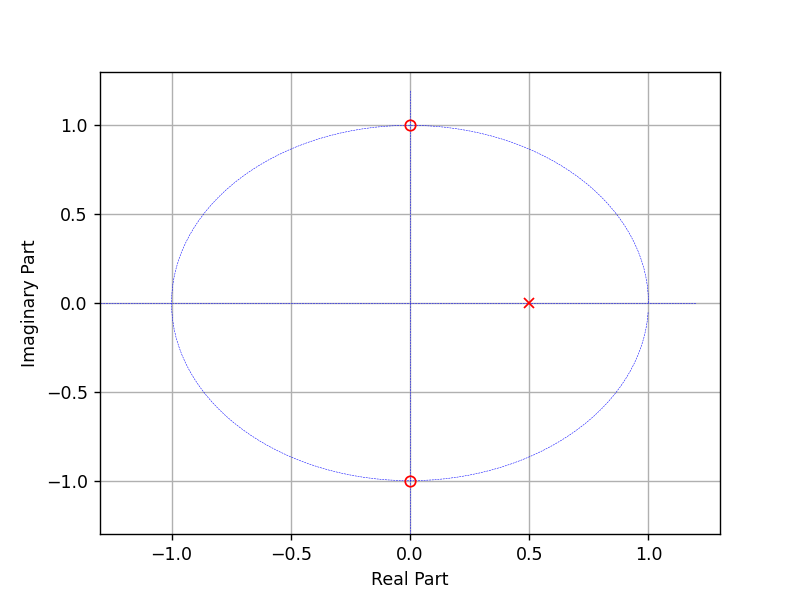

In [7]:
num = np.array([1,0,1])
denum = np.array([1,-1.0/2])

zplane.zplane(num,denum)

<IPython.core.display.Javascript object>


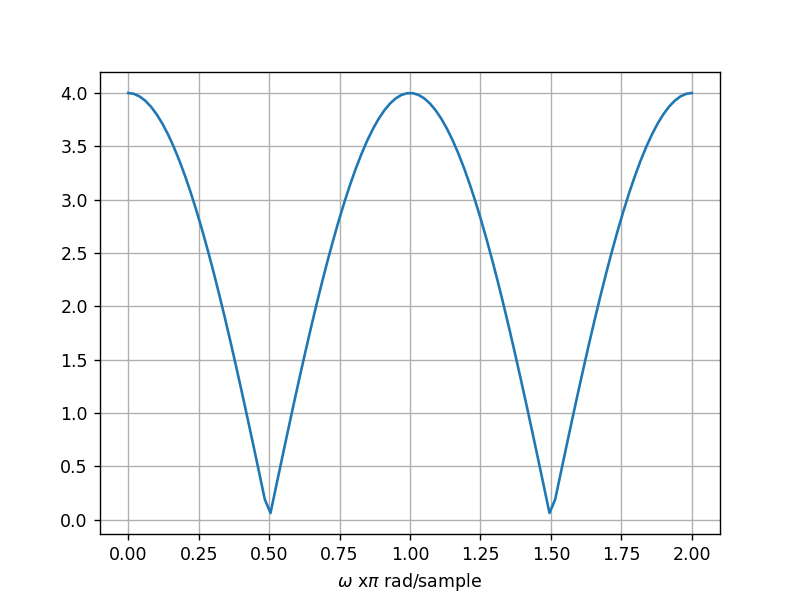

Text(0.5, 0, '$\\omega$ x$\\pi$ rad/sample')

In [8]:
w = np.linspace(0,2*np.pi,100)
Hw = (1+np.exp(-2*1j*w))/(1-(1/2))*np.exp(-1j*w)

Hw_abs = np.abs(Hw)
plt.figure()
plt.plot(w/np.pi,Hw_abs)
plt.grid()
plt.xlabel('$\omega$ x$\pi$ rad/sample')

## Ön hazırlık ödevleri (ÖDEV-4 başlığı altındaki soruların çözümleri aşağıda verilecek)

### SORU-1

### a)

## Fark denklemi olarak verilen $ y[n] = \frac{1}{2} y[n-1] - 4y[n-2] + 2y[n-3] + x[n] + \frac{2}{3} x[n-1] + \frac{1}{9} x[n-2] $ --> Sistem fonksiyonu $ H(z) = \frac{Y(z)}{X(z)} $ ile bulunur.
$ Y(z) = \frac{1}{2}z^{-1}Y(z) - 4z^{-2}Y(z) + 2z^{-3}Y(z) + X(z) + \frac{2}{3}z^{-1}X(z) + \frac{1}{9} X(z)z^{-2} \Rightarrow $
$ Y(z) - \frac{1}{2}z^{-1}Y(z) +  z^{-2}4Y(z)  - 2 Y(z)z^{-3} = X(z) + \frac{2}{3}z^{-1}X(z) + \frac{1}{9}z^{-2}X(z) \Rightarrow $
$  Y(z)[1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}] = X(z)[1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2} ] \Rightarrow $

$ \frac{Y(z)}{X(z)} = H(z) = \frac{1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}}$
## $  H(z) = \frac{1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}} $ olarak bulunur.


### b)

<IPython.core.display.Javascript object>


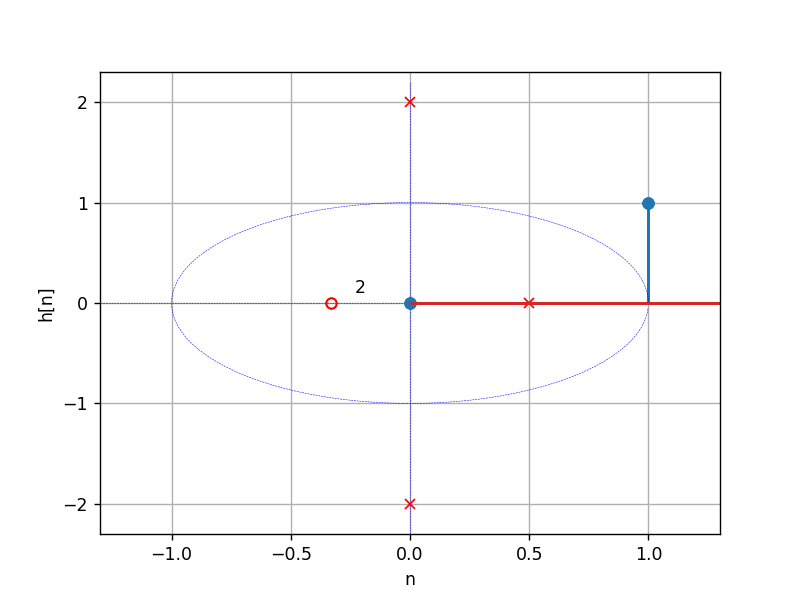

In [14]:
import zplane
import matplotlib.pyplot as plt
import numpy as np

num   = np.array([1, 2.0/3, 1.0/9])
denum = np.array([1, -1.0/2, 4, -2])

zplane.zplane(num,denum)

### c)

$h[n] = 0, n<0$ ise sistem nedenseldir. Sistem nedensel ise sağ yanlıdır ve sistemin z transformu olduğuna göre ROC bölgesi kutup içermemelidir. Buna göre $ROC: |z|>2$ olmalıdır.

Eğer sistemin fourier dönüşümü varsa $ROC: 0.5 < |z| < 2$ şeklinde halka oluşturur.

### d)

<IPython.core.display.Javascript object>


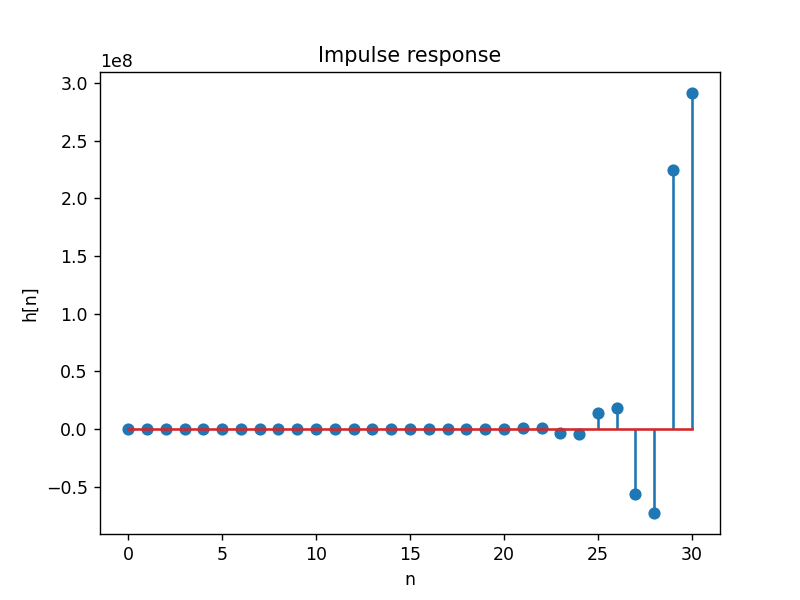

Text(0.5, 1.0, 'Impulse response')

In [20]:
n, x = sgnl.dimpulse((num,denum,1),x0=0, n=31)
plt.figure()
plt.stem(n,np.squeeze(x))
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Impulse response')

Sistemin eksi sonsuz artı sonzu aralığındaki dürtü cevaplarının toplamı sonlu ise sistem kararlıdır. Fakat yukarıda $n=0..30$ değerlerinde çizilen grafikten görülebildiği gibi sistemin dürtü cevabı toplamları sonsuza gitmektedir. Sistem kararlı değildir.

### e)

Sistemin hem nedensel hem kararlı olması için $z=2j$ ve $z=-2j$ köklerinin olmaması gerekiyor. Bunun için H(z) sistem fonksiyonunu $(z+2j)*(z-2j)$ ile çarpmak gereklidir.
$H'(z) = H(z)*(z+2j)*(z-2j)$

$H'(z)$ = (z+2j)*(z-2j)* $ \frac{1 + \frac{2}{3} z^{-1} + \frac{1}{9} z^{-2}} {1 - \frac{1}{2}z^{-1} +  4z^{-2}  - 2z^{-3}} $

$ H'(z) = \frac{ z^2 + \frac{2}{3}z + \frac{37}{9} + \frac{8}{3}z^{-1} + \frac{4}{9}z^{-2}}{1 - \frac{1}{2}z^{-1} +4z^{-2} -2z^{-3}}$ olur.


### f)

<IPython.core.display.Javascript object>


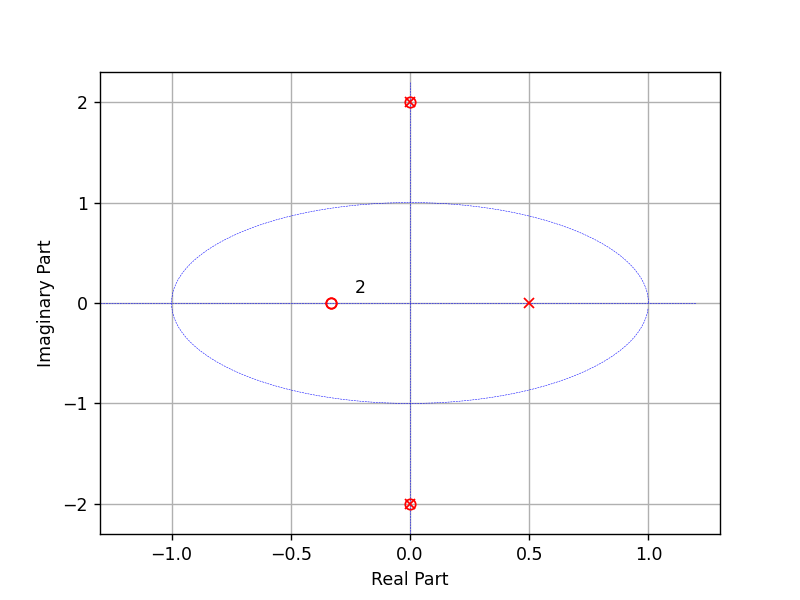

In [36]:
num   = np.array([1, 2.0/3, 37.0/9, 8.0/3, 4.0/9])
denum = np.array([0 ,1, -1.0/2, 4, -2])
zplane.zplane(num,denum)

z düzlemine baktığımızda poles ve zeros $z=-2j$ ve $z=2j$ noktlarında görülmektedir.

<IPython.core.display.Javascript object>


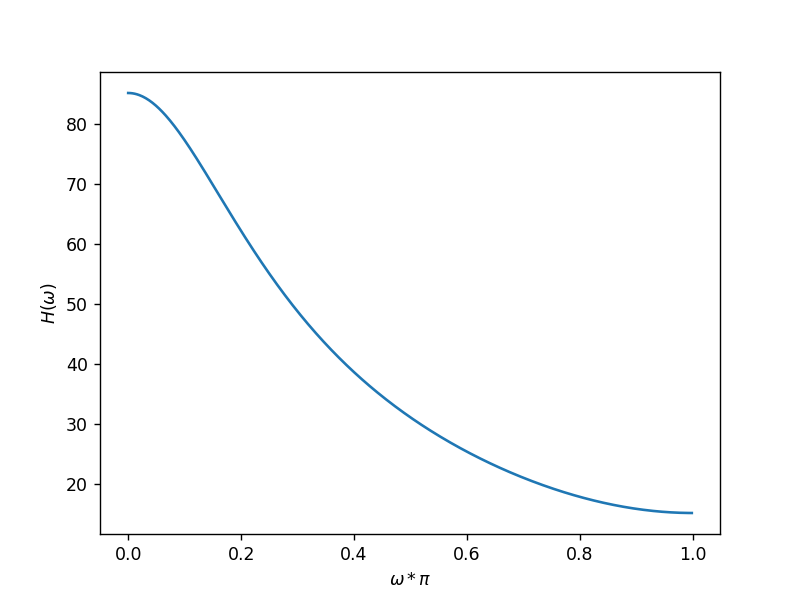

<IPython.core.display.Javascript object>


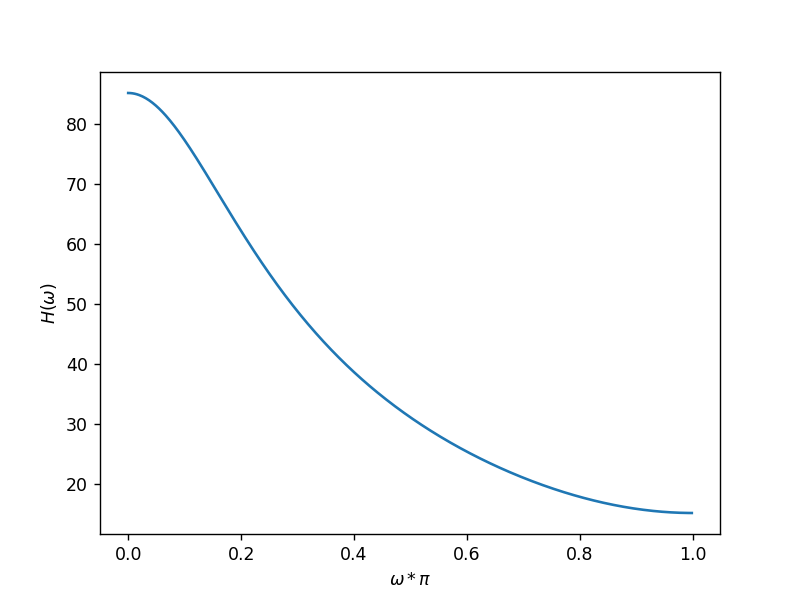

<IPython.core.display.Javascript object>


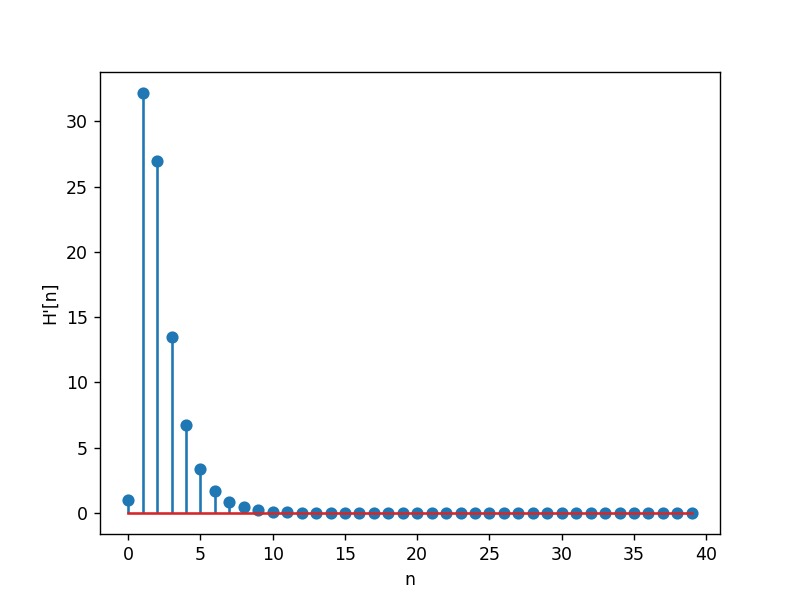

Text(0, 0.5, "H'[n]")

In [45]:
def dirac(x):
    if x==0:
        return 1
    else:
        return 0

zeros = np.array([-0.33,-0,33])
poles = np.array([0.5])
num   = np.array([1,2.0/3,37.0/9,8.0/3,4.0/9])
denum = np.array([0,1,-1.0/2,4,-2])

w,H = sgnl.freqz_zpk(zeros,poles,1)
plt.figure()
plt.plot(w/np.pi,np.abs(H))
plt.ylabel('$H(\omega)$')
plt.xlabel("$\omega*\pi$")

num,denum = sgnl.zpk2tf(zeros,poles,1)
w1, H = sgnl.freqz(num,denum)
plt.figure()
plt.plot(w1/np.pi,np.abs(H))
plt.xlabel("$\omega*\pi$")
plt.ylabel('$H(\omega)$')

n   = np.arange(0,40,1)
x_n = np.zeros(len(n))
for i in range(len(n)):
    x_n[i] = dirac(n[i])
    
y_n = sgnl.lfilter(num,denum,x_n)
plt.figure()
plt.stem(n,np.abs(y_n))
plt.xlabel('n')
plt.ylabel("H'[n]")